In [3]:
!unzip -FF '/content/ezyzip.zip'

Archive:  /content/ezyzip.zip
   creating: valid/
   creating: valid/spider-man/
  inflating: valid/spider-man/pic_001.jpg  
  inflating: valid/spider-man/pic_004.jpg  
  inflating: valid/spider-man/pic_007.jpg  
  inflating: valid/spider-man/pic_009.jpg  
  inflating: valid/spider-man/pic_022.jpg  
  inflating: valid/spider-man/pic_027.jpg  
  inflating: valid/spider-man/pic_030.jpg  
  inflating: valid/spider-man/pic_031.jpg  
  inflating: valid/spider-man/pic_039.jpg  
  inflating: valid/spider-man/pic_050.jpg  
  inflating: valid/spider-man/pic_062.jpg  
  inflating: valid/spider-man/pic_068.jpg  
  inflating: valid/spider-man/pic_072.jpg  
  inflating: valid/spider-man/pic_087.jpg  
  inflating: valid/spider-man/pic_088.jpg  
  inflating: valid/spider-man/pic_091.jpg  
  inflating: valid/spider-man/pic_098.jpg  
  inflating: valid/spider-man/pic_103.jpg  
  inflating: valid/spider-man/pic_104.jpg  
  inflating: valid/spider-man/pic_120.jpg  
  inflating: valid/spider-man/pic_123.j

In [4]:
#Load libraries
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib

In [36]:
from PIL import Image
import torchvision.transforms.functional  as TF
import torch.optim as optim
from torch.optim import lr_scheduler

In [25]:
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

In [10]:
os.getcwd()

'/content'

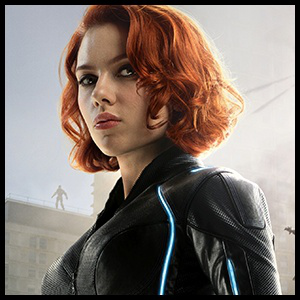

In [13]:
p='/content/train/black widow/pic_004.jpg' 
img=Image.open(p)
img

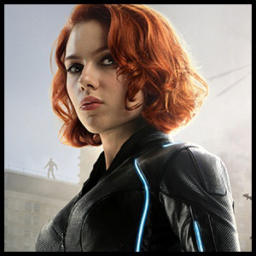

In [14]:
TF.resize(img,(256,256))

In [53]:
img.size

(300, 300)

In [19]:
class_dir='/content/train/black widow/'

In [20]:
images=os.listdir(class_dir)
images

['pic_172.jpg',
 'pic_229.jpg',
 'pic_145.jpg',
 'pic_003.jpg',
 'pic_087.jpg',
 'pic_203.jpg',
 'pic_039.jpg',
 'pic_206.jpg',
 'pic_214.jpg',
 'pic_123.jpg',
 'pic_111.jpg',
 'pic_137.jpg',
 'pic_121.jpg',
 'pic_163.jpg',
 'pic_071.jpg',
 'pic_149.jpg',
 'pic_037.jpg',
 'pic_103.jpg',
 'pic_185.jpg',
 'pic_175.jpg',
 'pic_176.jpg',
 'pic_104.jpg',
 'pic_224.jpg',
 'pic_186.jpg',
 'pic_134.jpg',
 'pic_091.jpg',
 'pic_187.jpg',
 'pic_076.jpg',
 'pic_108.jpg',
 'pic_082.jpg',
 'pic_141.jpg',
 'pic_096.jpg',
 'pic_135.jpg',
 'pic_069.jpg',
 'pic_046.jpg',
 'pic_089.jpg',
 'pic_146.jpg',
 'pic_109.jpg',
 'pic_201.jpg',
 'pic_064.jpg',
 'pic_032.jpg',
 'pic_205.jpg',
 'pic_095.jpg',
 'pic_016.jpg',
 'pic_042.jpg',
 'pic_215.jpg',
 'pic_190.jpg',
 'pic_219.jpg',
 'pic_216.jpg',
 'pic_164.jpg',
 'pic_161.jpg',
 'pic_179.jpg',
 'pic_030.jpg',
 'pic_183.jpg',
 'pic_102.jpg',
 'pic_098.jpg',
 'pic_097.jpg',
 'pic_021.jpg',
 'pic_118.jpg',
 'pic_209.jpg',
 'pic_044.jpg',
 'pic_018.jpg',
 'pic_07

In [21]:
from torchvision import datasets, models, transforms

In [26]:
data_dir ='/content/'
image_datasets={'train':datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                          data_transforms['train']),
                'valid':datasets.ImageFolder(os.path.join(data_dir, 'valid'),
                                          data_transforms['valid'])
                }

In [27]:
dataloaders = {'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=4,
                                             shuffle=True, num_workers=0),
                'valid': torch.utils.data.DataLoader(image_datasets['valid'], batch_size=4,
                                             shuffle=True, num_workers=0),
               }
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}

In [28]:
class_names = image_datasets['train'].classes
print(class_names)

['black widow', 'captain america', 'hulk', 'ironman', 'spider-man']


In [63]:
def train_model(model, criterion, optimizer, num_epochs=4):

    true_val=[]
    pred=[]

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:

                true_val+=labels

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    pred+=preds
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # if phase == 'train':
            #     scheduler.step()



            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
             
             


        print()


    
    return model

In [30]:
model_conv = torchvision.models.vgg16(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [41]:
model_conv.classifier = nn.Linear(25088, 5)

criterion = nn.CrossEntropyLoss()

In [64]:
# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.classifier.parameters(), lr=0.01, momentum=0.9)



model_conv = train_model(model_conv, criterion, optimizer_conv,
                         num_epochs=5)

Epoch 0/4
----------
train Loss: 64.5503 Acc: 0.6991
valid Loss: 110.8998 Acc: 0.6335

Epoch 1/4
----------
train Loss: 63.9179 Acc: 0.7125
valid Loss: 135.2369 Acc: 0.6228

Epoch 2/4
----------
train Loss: 70.5475 Acc: 0.7156
valid Loss: 155.7956 Acc: 0.5765

Epoch 3/4
----------
train Loss: 71.8137 Acc: 0.7373
valid Loss: 132.7052 Acc: 0.6050

Epoch 4/4
----------
train Loss: 59.3843 Acc: 0.7580
valid Loss: 148.9688 Acc: 0.6157

